In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Display first few rows
print("Dataset Loaded Successfully\n")
data.head()


Dataset Loaded Successfully



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Basic info
print("\nDataset Info:")
print(data.info())

# Missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary
print("\nSummary Statistics:")
print(data.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721

In [7]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
print("Column Names in Dataset:")
print(data.columns.tolist())


Column Names in Dataset:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'DBSCAN_Cluster']


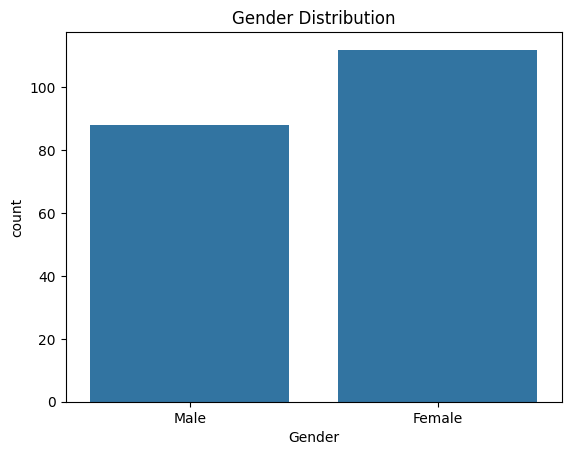

In [21]:
# Clean & Prepare Dataset
data.rename(columns={'Genre': 'Gender'}, inplace=True)
data = data.drop(columns=['Cluster', 'DBSCAN_Cluster'], errors='ignore')

# Gender Distribution
if 'Gender' in data.columns:
    sns.countplot(x='Gender', data=data)
    plt.title('Gender Distribution')
    plt.show()
else:
    print("'Gender' column not found — skipping gender visualization.")



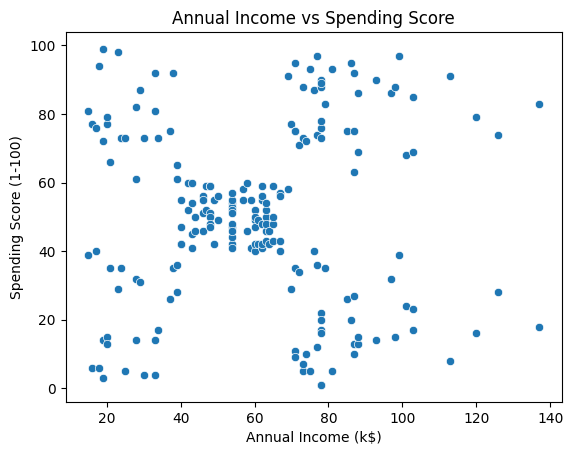

In [22]:
# Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income vs Spending Score')
plt.show()

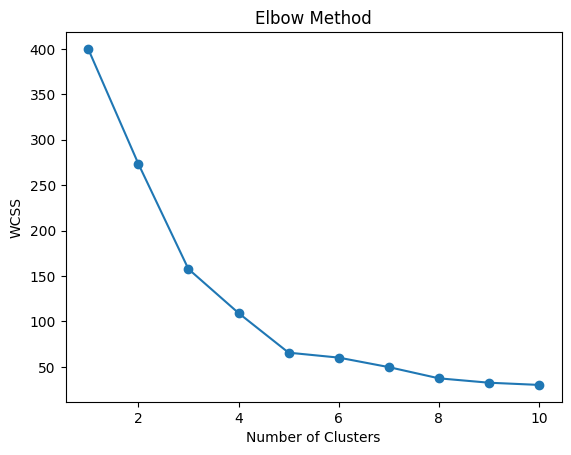

In [9]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
# Train model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
data['Cluster'] = y_kmeans


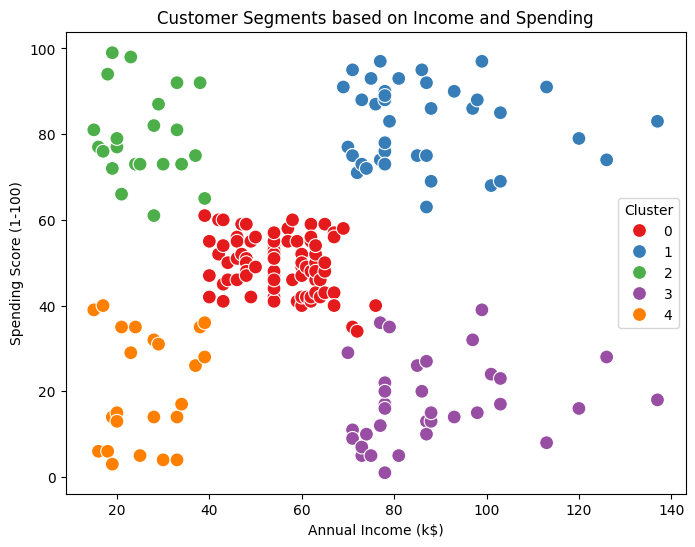

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments based on Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [14]:
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K-Means: {score:.3f}")

Silhouette Score for K-Means: 0.555


In [15]:
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\n Average values per cluster:\n")
print(cluster_summary)



 Average values per cluster:

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


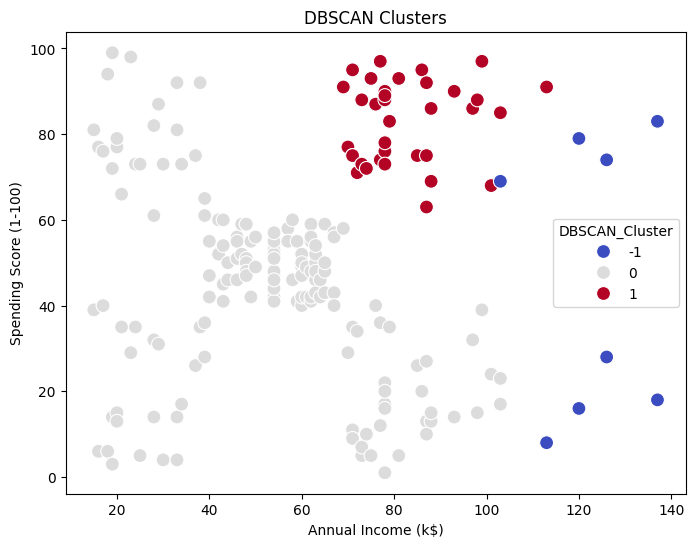

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

# Add DBSCAN results
data['DBSCAN_Cluster'] = y_db

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=data['DBSCAN_Cluster'],
    palette='coolwarm',
    s=100
)
plt.title('DBSCAN Clusters')
plt.show()


In [17]:
import joblib
joblib.dump(kmeans, "customer_segmentation_model.pkl")
print("\n Model saved successfully as 'customer_segmentation_model.pkl'")



 Model saved successfully as 'customer_segmentation_model.pkl'


In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [25]:
# X_scaled is your standardized data
# y_kmeans is the cluster labels from KMeans

silhouette = silhouette_score(X_scaled, y_kmeans)
davies = davies_bouldin_score(X_scaled, y_kmeans)
calinski = calinski_harabasz_score(X_scaled, y_kmeans)

print(f" Silhouette Score: {silhouette:.3f}")
print(f" Davies-Bouldin Index: {davies:.3f}")
print(f" Calinski-Harabasz Score: {calinski:.3f}")


 Silhouette Score: 0.555
 Davies-Bouldin Index: 0.572
 Calinski-Harabasz Score: 248.649
